In [1]:
import seaborn as sns
#붓꽃 데이터셋 로딩
iris = sns.load_dataset("iris")
print(iris.head())
print(iris.tail())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


In [2]:
#데이터셋의 요약 정보
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
#품종 확인
iris['species'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# iloc 숫자 기반의 슬라이싱
X=iris.iloc[:,:4].values # 독립변수
y=iris.iloc[:,4].values # 종속변수
print(y[:5])
encoder=LabelEncoder() # 문자열에 label을 붙임
y1=encoder.fit_transform(y) # 텍스트를 숫자로 변환
print(y1)
y2=pd.get_dummies(y1).values # 종속변수에 대한 원핫인코딩 처리
print(y2[:5])


['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [8]:
from sklearn.model_selection import train_test_split
# 학습용, 검증용 데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, stratify=y,random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [9]:
from keras.models import Sequential
from keras.layers import Dense
# 모델 생성
model = Sequential()
# hidden-1, 입력노드 4개, 출력노드 64개
model.add(Dense(64,input_shape=(4,),activation='relu'))
# hidden-2, 입력노드 64개, 출력노드 64개
model.add(Dense(64,activation='relu'))
# output, 입력노드 64개, 출력노드 3개, 활성화함수 softmax(출력이 2개 이상 일 때)/출력이 1개(sigmoid)
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# 모델 학습
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 8ms/step - loss: 1.0912 - accuracy: 0.2750
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.9627 - accuracy: 0.3167
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8675 - accuracy: 0.6750
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7793 - accuracy: 0.6833
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7023 - accuracy: 0.6667
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6419 - accuracy: 0.7250
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5907 - accuracy: 0.7667
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5495 - accuracy: 0.7000
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5105 - accuracy: 0.8167
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4800 - accuracy: 0.9417
Epoch 11/100
4/4 [===========

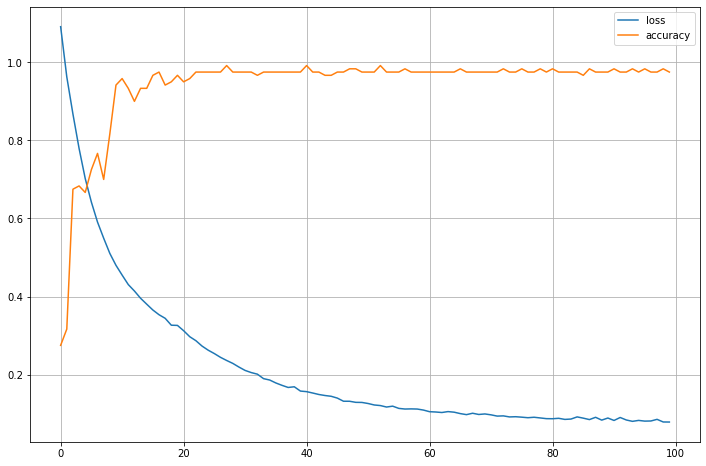

In [15]:
import matplotlib.pyplot as plt
# 그래프 출력
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 손실률
plt.plot(hist.history['accuracy']) # 정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [20]:
# 모델 평가
model.evaluate(X_test, y_test, verbose=0)
# 손실, 정확도


[0.07400999218225479, 1.0]

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
print(pred[:10])
y_test_class = np.argmax(y_test,axis=1)
pred_class = np.argmax(pred,axis=1)
print(y_test_class[:10])
print(pred_class[:10])
print(confusion_matrix(y_test_class,pred_class))

1/1 [==============================] - 0s 21ms/step
[[5.9085398e-04 8.4137493e-01 1.5803427e-01]
 [9.9680436e-01 3.1956912e-03 8.3984114e-10]
 [3.5128303e-04 5.4654652e-01 4.5310214e-01]
 [7.9856371e-05 3.6082712e-01 6.3909298e-01]
 [1.4115089e-02 9.8248786e-01 3.3970615e-03]
 [7.2090847e-06 6.3018352e-02 9.3697441e-01]
 [9.9521744e-01 4.7825812e-03 4.8195461e-09]
 [8.3329354e-07 8.8753235e-03 9.9112391e-01]
 [5.5710717e-07 9.2994105e-03 9.9070007e-01]
 [9.9979001e-01 2.1000960e-04 1.5012084e-12]]
[1 0 1 2 1 2 0 2 2 0]
[1 0 1 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [18]:
# keras 신경망 모형 저장
model.save('c:/data/iris')

INFO:tensorflow:Assets written to: c:/data/iris\assets
